<a href="https://colab.research.google.com/github/likeshd/tensorflow_modules/blob/main/Tensorflow_1__1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"C:\Users\phani\OneDrive\Trainings\Boston.csv")

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Dataset Link - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population

In [ ]:
X = data.drop(columns = ["medv"]) # Independent vars
y = data["medv"] # Target

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


### Neural Networks using Tensorflow

- Model Initialization - Define the network architecture
    - #Inputs
    - #Outputs
    - #Hidden Layers
    - #Units in HL
    - Activation Functions
- Model Compilation - Type of problem
    - Classification / Regression  - Loss function
        - Reg : MSE
        - Classfn : LogLoss/Cross Entropy
    - Optimizer
        - Stochastic Gradient Descent
        - Adam
        - RMSProp
        - AdaDelta
        - AdaGrad
    - Learning Rate
- Model Train/Fit
    - Dataset
        - Train
        - Validation
    - Iterations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential() # Empty model without any HL's
model.add(Input(13,))
model.add(Dense(5,activation='relu'))
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.05), loss="mean_squared_error") # MSE because of a regression problem or continuous output
# Adagrad, Adadeta, Adaml

In [ ]:
model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test,y_test), batch_size=64)

Epoch 1/150
6/6 [==============================] - 1s 81ms/step - loss: 513.2048 - val_loss: 187.8954
Epoch 2/150
6/6 [==============================] - 0s 10ms/step - loss: 151.3286 - val_loss: 102.9058
Epoch 3/150
6/6 [==============================] - 0s 10ms/step - loss: 95.1748 - val_loss: 64.7361
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 81.4974 - val_loss: 53.8353
Epoch 5/150
6/6 [==============================] - 0s 12ms/step - loss: 69.9812 - val_loss: 48.1737
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 66.2051 - val_loss: 48.0316
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 65.9502 - val_loss: 45.0271
Epoch 8/150
6/6 [==============================] - 0s 11ms/step - loss: 65.6928 - val_loss: 42.9027
Epoch 9/150
6/6 [==============================] - 0s 13ms/step - loss: 64.0498 - val_loss: 45.9200
Epoch 10/150
6/6 [==============================] - 0s 11ms/step - loss: 61.8462 - val_loss: 41.5

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 70        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

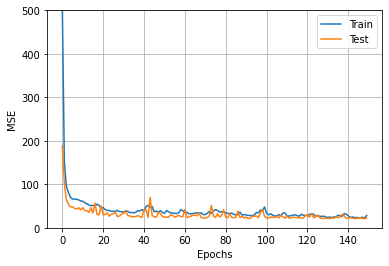

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim((0,500))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

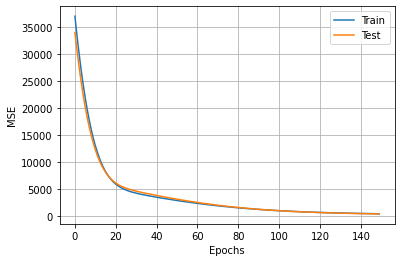

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("MSE")
# plt.ylim((0,3000))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [ ]:
preds = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


### Computing final RMSE

In [ ]:
preds = preds.flatten()
actuals = np.array(y_test)

In [ ]:
np.sqrt(np.mean((actuals-preds)**2)) # RMSE

4.7132279352374